In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats

# Import dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving case1.csv to case1.csv


In [ ]:
url = "case1.csv"
data = pd.read_csv(url, header = 0,  parse_dates= ["month_year"])
data
data = data.set_index("month_year")

In [ ]:
data

,y,x1,x2,x3,x4,x5
month_year,,,,,,
2000-02-01,91.6261,0.695,6.63,1570.90,22.6,115232
2000-03-01,91.9626,0.819,6.23,1852.90,37.9,115573
2000-04-01,92.3118,0.857,6.05,1946.30,19.4,115932
2000-05-01,92.8872,0.732,5.85,2391.20,14.7,116631
2000-06-01,93.1620,0.896,6.15,2209.90,20.9,117295
...,...,...,...,...,...,...
2022-08-01,104.4852,3.283,3.10,1822.57,4.4,400415
2022-09-01,104.4135,2.793,3.13,1688.85,18.0,403957
2022-10-01,104.8129,2.578,3.56,1736.47,4.6,405466


In [ ]:
data = data.iloc[:-1, :]
data

,y,x1,x2,x3,x4,x5
month_year,,,,,,
2000-02-01,91.6261,0.695,6.63,1570.90,22.6,115232
2000-03-01,91.9626,0.819,6.23,1852.90,37.9,115573
2000-04-01,92.3118,0.857,6.05,1946.30,19.4,115932
2000-05-01,92.8872,0.732,5.85,2391.20,14.7,116631
2000-06-01,93.1620,0.896,6.15,2209.90,20.9,117295
...,...,...,...,...,...,...
2022-07-01,103.9464,4.049,3.25,1824.05,11.7,394222
2022-08-01,104.4852,3.283,3.10,1822.57,4.4,400415
2022-09-01,104.4135,2.793,3.13,1688.85,18.0,403957


In [ ]:
data 
df = data.values
y, X = df[:, 0], df[:, 1:]

In [ ]:
pd.DataFrame(X[:, :-1]).describe()

,0,1,2,3
count,274.000000,274.000000,274.000000,274.000000
mean,1.773015,3.842080,2172.059270,18.210584
std,0.734671,1.221382,561.869456,10.931672
min,0.501000,1.270000,1017.800000,-18.600000
25%,1.197250,2.892500,1783.332500,11.125000
50%,1.697500,3.780000,2235.310000,18.950000
75%,2.298750,4.850000,2439.452500,25.475000
max,4.049000,6.630000,3812.550000,41.200000


# Visualization:

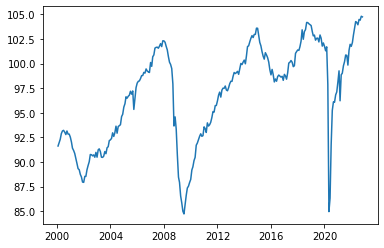

In [ ]:
plt.plot(data.iloc[:,0])

# Data preparation:

In [ ]:
data.index

DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01'],
              dtype='datetime64[ns]', name='month_year', length=274, freq=None)

# Checking correlations:

In [ ]:
plt.plot(df1.iloc[df1.shape[0]:0:-1, 0].reset_index().iloc[:, 1])

NameError: ignored

In [ ]:
df1.iloc[df1.shape[0]:0:-1, 0].reset_index().iloc[:, 1]

In [ ]:
df1.shape[0]

In [ ]:
df1 = data.iloc[1:, :]
corrs = df1.corr()
fig, ax = plt.subplots(figsize = (6,6))
heatcor = sns.heatmap(corrs, cbar=True ,ax=ax).set(title = 'Correlation Map', xlabel = 'Columns', ylabel = 'Columns' )

In [ ]:
cm = np.corrcoef(df1.corr().values.T)
heatcor = sns.heatmap(cm, cbar = True, annot = True, cmap='BrBG', yticklabels = df1.columns, xticklabels= df1.columns)

> x2 seems to be the column most linearly correlated with y.

> Collinearity!


In [ ]:
sns.pairplot(df1)

In [ ]:
plt.plot(np.log(y))

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(y, fit=norm)
plt.subplot(1,2,2)
res = stats.probplot(y, plot=plt)
plt.tight_layout()

> Pretty satisfies condition of normality.

# Build models:

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV , RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, ARDRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb

## Time Series Cross Validation:

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tss = TimeSeriesSplit(n_splits = 8, test_size = 12, gap = 0)

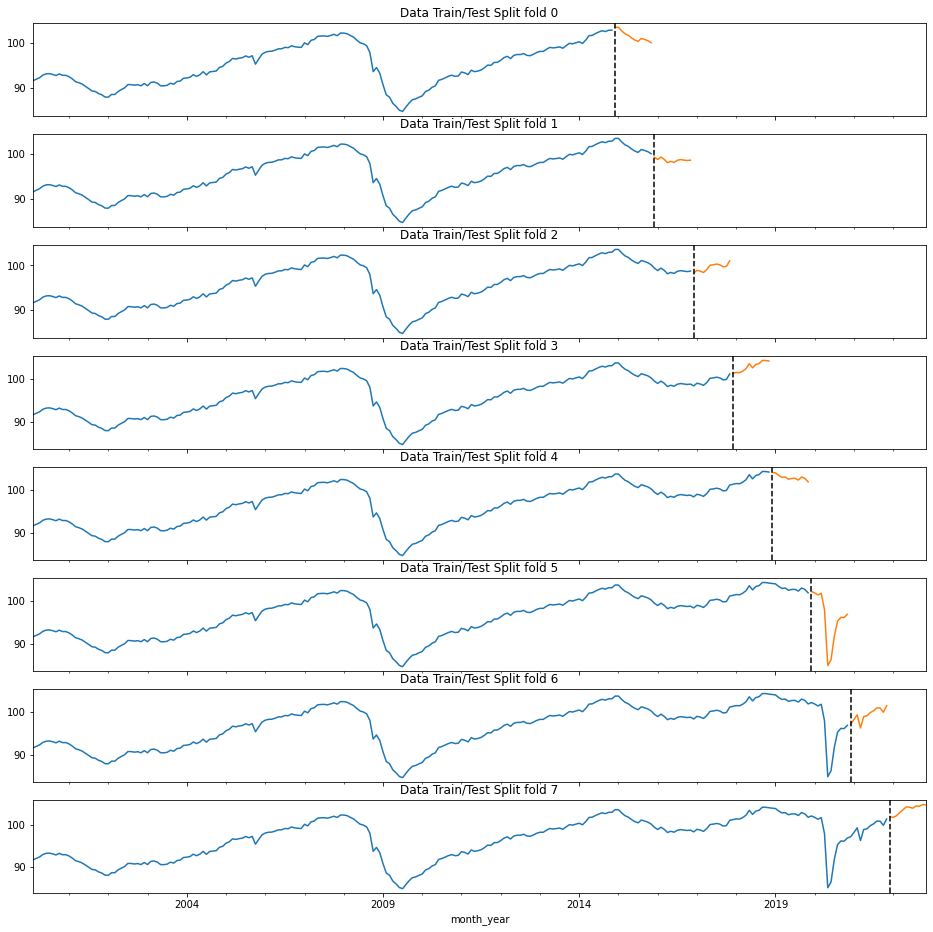

In [ ]:
fig, axs = plt.subplots(8, 1, figsize = (16, 16), sharex = True)

fold = 0 
for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    train["y"].plot(ax = axs[fold],
                                 #label = "Training set",
                                 title = f'Data Train/Test Split fold {fold}')
    test["y"].plot(ax = axs[fold], label = "Test Set")
    axs[fold].axvline(test.index.min(), color = "black", ls = "--")
    fold += 1
plt.show()

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('Enet',ElasticNet(alpha=0.5, l1_ratio=0.2)))
models.append(('Lasso', Lasso()))
models.append(('ARD_Reg', ARDRegression()))
models.append(('SVR', SVR()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('XGB', xgb.XGBRegressor(objective = 'reg:squarederror')))
models.append(('LightGBM', lgb.LGBMRegressor()))

In [ ]:
# For y: it's pretty normally distributed. So we just need to transform X.
X_scale = StandardScaler().fit_transform(X)

## Train models with scaled data:

For LR , the root mean squared error is: 3.616015(2.291295)
For Enet , the root mean squared error is: 3.494637(1.785328)
For Lasso , the root mean squared error is: 4.602134(1.922303)
For ARD_Reg , the root mean squared error is: 3.657266(2.404922)
For SVR , the root mean squared error is: 3.137229(2.031171)
For RandomForest , the root mean squared error is: 3.291894(1.671563)
For XGB , the root mean squared error is: 3.380488(1.947851)
For LightGBM , the root mean squared error is: 3.732462(2.111382)


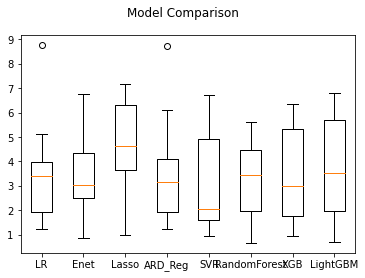

In [ ]:
names = []
results_rmse = []
results_mae = []
for name, model in models:
    tss = TimeSeriesSplit(n_splits = 8, test_size = 12, gap = 0)
    cv_results_rmse = - cross_val_score(model, X_scale, y, cv = tss, scoring = 'neg_root_mean_squared_error' )
    results_rmse.append(cv_results_rmse)
    names.append(name)
    rmse_msg = 'For ' '%s' ' , the root mean squared error is: ' '%f(%f)' % (name, cv_results_rmse.mean(), cv_results_rmse.std())
    print(rmse_msg)
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_rmse)
ax.set_xticklabels(names)
plt.show()

## Train models with un-scaled data:

In [ ]:
names = []
results_rmse = []
results_mae = []
for name, model in models:
    tss = TimeSeriesSplit(n_splits = 8, test_size = 12, gap = 0)
    cv_results_rmse = - cross_val_score(model, X, y, cv = tss, scoring = 'neg_root_mean_squared_error' )
    cv_results_mae  = - cross_val_score(model, X, y, cv = tss, scoring = 'neg_mean_absolute_error')
    results_rmse.append(cv_results_rmse)
    results_mae.append(cv_results_mae)
    names.append(name)
    rmse_msg = 'For ' '%s' ' , the root mean squared error is: ' '%f(%f)' % (name, cv_results_rmse.mean(), cv_results_rmse.std())
    mae_msg = 'For ' '%s' ' , the mean absolute error is: ' '%f(%f)' % (name, cv_results_mae.mean(), cv_results_mae.std())
    print(rmse_msg)
    print(mae_msg)
    print("-----------------------------------------------------------------------")

For LR , the root mean squared error is: 3.616015(2.291295)
For LR , the mean absolute error is: 3.130390(1.835731)
-----------------------------------------------------------------------
For Enet , the root mean squared error is: 3.486716(1.971401)
For Enet , the mean absolute error is: 2.995043(1.553049)
-----------------------------------------------------------------------
For Lasso , the root mean squared error is: 3.547820(1.881801)
For Lasso , the mean absolute error is: 3.067078(1.574291)
-----------------------------------------------------------------------
For ARD_Reg , the root mean squared error is: 3.848437(2.076345)
For ARD_Reg , the mean absolute error is: 3.311195(1.868826)
-----------------------------------------------------------------------
For SVR , the root mean squared error is: 4.331102(1.969596)
For SVR , the mean absolute error is: 3.925405(1.647121)
-----------------------------------------------------------------------
For RandomForest , the root mean squar

In [ ]:
# from sklearn.linear_model import ElasticNetCV

# tss = TimeSeriesSplit(n_splits = 8, test_size = 12, gap = 0)
# ratios = np.arange(0, 1, 0.01)
# alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
# model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=tss, n_jobs=-1)
# model.fit(X, y)
# print('alpha: %f' % model.alpha_)
# print('l1_ratio_: %f' % model.l1_ratio_)

In [ ]:
results_rmse_copy = pd.DataFrame(results_rmse)
results_rmse_copy.columns = names 
results_rmse_copy

,LR,Enet,Lasso,ARD_Reg,SVR,RandomForest,XGB,LightGBM
0,3.577164,1.272519,3.293770,2.168568,1.243301,8.753043,3.495598,5.124155
1,4.462825,2.066241,1.985987,2.372946,1.418702,7.657794,2.847297,5.081939
2,5.656879,3.078370,1.336052,2.702952,1.736454,7.050766,2.300184,4.520902
3,7.045923,2.233856,1.854641,2.543420,2.412834,7.482015,3.059432,4.155378
4,7.129875,2.825643,2.506787,3.969808,2.751720,7.665349,2.578339,5.221295
5,4.308019,4.194986,0.623573,2.996184,1.486132,5.668177,2.008487,5.026883
6,5.425261,3.159837,1.048232,2.799619,0.962529,6.358039,1.987799,5.317495
7,6.453677,3.952242,0.714365,2.699515,1.751621,5.783704,2.122436,5.788914


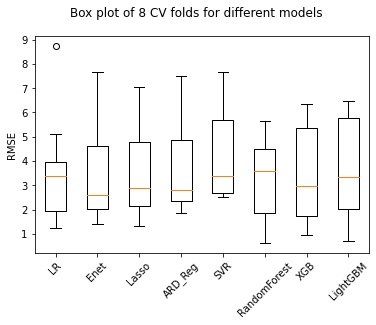

In [ ]:
# Visualization: 
fig = plt.figure()
fig.suptitle('Box plot of 8 CV folds for different models')
ax = fig.add_subplot(111)
plt.boxplot(results_rmse)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.ylabel('RMSE')
plt.show()

> The best models are:  Elastic Net, Random Forest & XGBoost.

## Making prediction on a certain interval of time:

In [ ]:
data_train = data.loc[data.index <= "2021-12-01"]
data_test   = data.loc[data.index > "2021-12-01"]

In [ ]:
X_train, y_train =  data_train.values[:, 1:], data_train.values[:, 0]
X_test, y_test    = data_test.values[:, 1:], data_test.values[:, 0]

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
tss = TimeSeriesSplit(n_splits = 8, test_size = 12, gap = 0)
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv= tss, n_jobs=-1)
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.918275810503, tolerance: 0.3154444670855688
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799.4802478680353, tolerance: 0.3818

alpha: 1.000000
l1_ratio_: 0.000000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460.01874833300735, tolerance: 0.3154444670855688
  model = cd_fast.enet_coordinate_descent_gram(
/usr

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, cv = tss, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train)
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 8 folds for each of 100 candidates, totalling 800 fits
Best Parameters:  {'n_estimators': 5, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}  



In [ ]:
# Build models:
m1 = ElasticNet(alpha=1, l1_ratio=0)
m1.fit(X_train, y_train)

m2 = RandomForestRegressor(n_estimators = 5, min_samples_split = 6, min_samples_leaf = 1, max_features = "auto", max_depth = 20, bootstrap = True)
m2.fit(X_train, y_train)

m3 = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, objective = 'reg:squarederror')
m3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+03, tolerance: 6.206e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


XGBRegressor(n_estimators=1000, objective='reg:squarederror')

In [ ]:
data_test["pred_Elas"] = m1.predict(X_test)
data_test["pred_RandomForest"] = m2.predict(X_test)
data_test["pred_XGB"] = m3.predict(X_test)

<ipython-input-94-5d920658621b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["pred_Elas"] = m1.predict(X_test)
<ipython-input-94-5d920658621b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["pred_RandomForest"] = m2.predict(X_test)
<ipython-input-94-5d920658621b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(data_test["y"], data_test["pred_Elas"], squared = False))
print(mean_squared_error(data_test["y"], data_test["pred_RandomForest"], squared = False))
print(mean_squared_error(data_test["y"], data_test["pred_XGB"], squared = False))

4.934481800449402
5.872652771854001
4.865505690074192


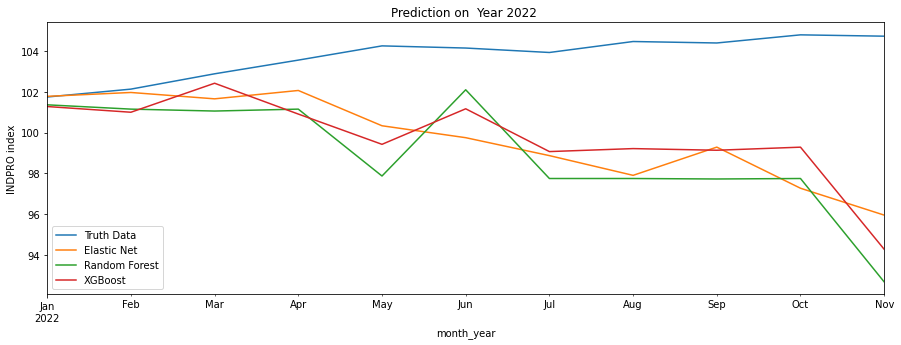

In [ ]:
data_test.loc[:, "y"].plot(figsize = (15,5), title = "Prediction on  Year 2022 ")
data_test.loc[:, "pred_Elas"].plot()
data_test.loc[:, "pred_RandomForest"].plot()
data_test.loc[:, "pred_XGB"].plot()
plt.legend(["Truth Data", "Elastic Net", "Random Forest", "XGBoost"])
plt.ylabel("INDPRO index")
plt.show()

# Interpretation:

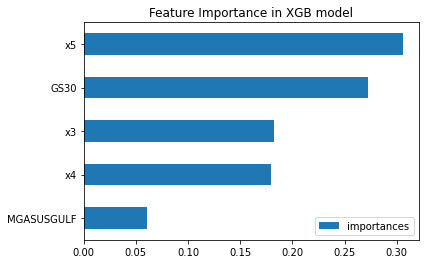

In [ ]:
# Feature importance of XGB:
fi = pd.DataFrame(data = m3.feature_importances_, 
                                    index = ["MGASUSGULF", "GS30", "x3", "x4", "x5"], 
                                    columns = ["importances"])
fi.sort_values("importances").plot(kind = "barh", title = "Feature Importance in XGB model")
plt.show()

In [ ]:
coef = pd.Series(m1.coef_, index =  ["MGASUSGULF", "GS30", "x3", "x4", "x5"])
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 5 variables and eliminated the other 0 variables


In [ ]:
imp_coef = pd.concat([coef.sort_values()])

In [ ]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=024f1df6ffdc2e2d4e8820b5b60b6b81760e3b23d161658d19a2efd13a9a1547
  Stored in directory: /root/.cache/pip/wheels/b1/02/58/77ac4cb307fec9f3324c6aa4f9f23a7b0e886e313ebc280257
Successfully built dalex


In [ ]:
exp_xgb  = dalex.Explainer(m3, data_train.iloc[:, 1:], data_train.iloc[:, 0])

# PDP profile for surface and construction.year variable
mprofile = exp_xgb.model_profile(variables = ["x3", "x4", "x1", "x2", "x5"] )

# comparison for random forest and linear regression model
rf_mprofile.plot(lm_mprofile)

Preparation of a new explainer is initiated

  -> data              : 263 rows 5 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 263 values
  -> model_class       : xgboost.sklearn.XGBRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f3cd56c3040> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         :  'residual_function' returns an Error when executed:
feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4'] ['x1', 'x2', 'x3', 'x4', 'x5']
expected f1, f4, f2, f3, f0 in input data
training data did not have the following fields: x3, x4, x1, x2, x5
  -> model_info        : package xgboost

A new explainer has been created!


Calculating ceteris paribus:   0%|          | 0/5 [00:00<?, ?it/s]


ValueError: ignored

In [ ]:
data_train.iloc[:, 1:]

,x1,x2,x3,x4,x5
month_year,,,,,
2000-02-01,0.695,6.63,1570.90,22.6,115232
2000-03-01,0.819,6.23,1852.90,37.9,115573
2000-04-01,0.857,6.05,1946.30,19.4,115932
2000-05-01,0.732,5.85,2391.20,14.7,116631
2000-06-01,0.896,6.15,2209.90,20.9,117295
...,...,...,...,...,...
2021-08-01,2.205,1.94,2233.37,41.2,301507
2021-09-01,2.215,1.92,2250.58,33.7,309522
2021-10-01,2.199,1.94,2253.28,23.6,317387


In [ ]:
train = xgb.DMatrix(data_train.iloc[:, 1:], label=y_train)
classifier = xgb.train({"learning_rate": 0.1, "n_estimators" : 1000, "objective" :  'reg:squarederror'}, train, verbose_eval=1)
exp = dalex.Explainer(classifier, data_train.iloc[:, 1:], y_train)

Preparation of a new explainer is initiated

  -> data              : 263 rows 5 cols
  -> target variable   : 263 values
  -> model_class       : xgboost.core.Booster (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_xgboost at 0x7f3cd56c31f0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 61.2, mean = 62.9, max = 63.7
  -> model type        : 'model_type' not provided and cannot be extracted.
  -> model type        : Some functionalities won't be available.
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 21.9, mean = 33.7, max = 40.5
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
new = pd.DataFrame({"x1": [2.837], 
                                            "x2": [4.04],
                                            "x3": [1462.59],
                                            "x4": [4.4],
                                            "x5": [405948]})
rf_profile = exp.predict_profile(new_observation = new)
rf_profile.plot(variables = ["x5", "x3", "x4", "x2"])
#exp.model_profile(variables = ["x5", "x3", "x4", "x2"]).plot()

Calculating ceteris paribus: 100%|██████████| 5/5 [00:00<00:00, 151.70it/s]


In [ ]:
data_test

,y,x1,x2,x3,x4,x5,pred_Elas,pred_RandomForest,pred_XGB
month_year,,,,,,,,,
2022-01-01,101.7587,2.129,1.85,2407.53,20.0,338803,101.791142,101.374464,101.290474
2022-02-01,102.1460,2.400,2.10,2217.18,26.2,346327,101.981168,101.162922,101.009895
2022-03-01,102.8987,2.648,2.25,2286.50,21.5,354222,101.668583,101.068576,102.434982
2022-04-01,103.5717,3.197,2.41,2224.28,24.8,363887,102.079570,101.162922,100.920250
2022-05-01,104.2709,3.180,2.81,1967.01,19.9,374527,100.345306,97.876068,99.433029
2022-06-01,104.1646,3.750,3.07,2164.81,9.6,385212,99.759457,102.113879,101.179771
2022-07-01,103.9464,4.049,3.25,1824.05,11.7,394222,98.878253,97.753649,99.076683
2022-08-01,104.4852,3.283,3.10,1822.57,4.4,400415,97.908909,97.753649,99.223389
2022-09-01,104.4135,2.793,3.13,1688.85,18.0,403957,99.295932,97.730169,99.142250
